# Starbucks Capstone Challenge

## Table Of Content
<a href='#I'>Introduction </a>

<a href='#PS'>Problem Statment </a>

<a href='#DD'>Data Discovery </a>
<ol><li> <a href= '#DD1'>portfolio.json</a></li>
    <li> <a href= '#DD2'>profile.json</a></li>
    <li> <a href= '#DD3'>transcript.json</a></li>
</ol>
<a href='#DC'>Data Cleaning </a>
<ol>
    <li> <a href= '#DC1'>portfolio</a></li>
    <li> <a href= '#DC2'>profile</a></li>
    <li> <a href= '#DC3'>transcript</a></li>
    <li> <a href= '#DC4'>Consolidation</a></li>
</ol>
<a href='#V'>Visualizations </a>
<a href='#M'>Modiling </a>
<ol>
    <li> <a href= '#M1'>Build Decision Tree Classifier</a></li>
    <li> <a href= '#M2'>Build Random Forest Classifier</a></li>
    <li> <a href= '#M3'>Build Gradient Boosting Classifier</a></li>
</ol>
<a href='#C'>Conclusion </a>
<ul>
    <li> <a href= '#C1'>Findings</a></li>
    <li> <a href= '#C2'>Challenges & Obstacles</a></li>
</ul>
<a> </a>



<a id='I'></a>
# Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

My ur task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

<a id='PS'></a>
# Problem Statment
In this project, we'll begin by discovering the data frames, then clean and merge them into a single data frame to perform some visualizations and build a model to predict the event type based on demographic data and other information.

<a id='DD'></a>
# Data Discovery

In this section, we'll use certain methodologies and visualization to get a concept of each file and what it contains.



In [1]:
import pandas as pd
import numpy as np
import math
import json
%matplotlib inline
import matplotlib.pyplot as plt


# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

<a id='DD1'></a>
## portfolio.json
containing offer ids and meta data about each offer (duration, type, etc.).
#### Here is the schema and explanation of each variable in the files:
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

In [2]:
# Displaying the dataframe
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [3]:
# Displaying the number of rows and columns
portfolio.shape

(10, 6)

In [4]:
# Displaying the types for each columns in the dataframe 
portfolio.dtypes

reward         int64
channels      object
difficulty     int64
duration       int64
offer_type    object
id            object
dtype: object

<a id='DD2'></a>
## profile.json
demographic data for each customer.
#### Here is the schema and explanation of each variable in the files:
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

In [5]:
# Displaying the dataframe
profile

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [6]:
# Displaying the number of rows and columns
profile.shape

(17000, 5)

In [7]:
# Displaying the types for each columns in the dataframe
profile.dtypes

gender               object
age                   int64
id                   object
became_member_on      int64
income              float64
dtype: object

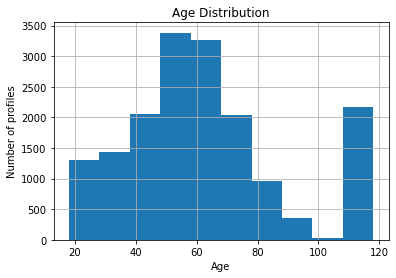

In [8]:
# Plotting age columns to get a sense of what custmers we have.
profile.age.hist();
plt.xlabel('Age')
plt.ylabel('Number of profiles')
plt.title('Age Distribution');

In [9]:
# Checking if there is any null values
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [10]:
# Checking if there is any duplicate values
profile.duplicated().sum()

0

<a id='DD3'></a>
## transcript.json
records for transactions, offers received, offers viewed, and offers completed
#### Here is the schema and explanation of each variable in the files:
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

In [11]:
# Displaying the dataframe
transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [12]:
# Displaying the number of rows and columns
transcript.shape

(306534, 4)

In [13]:
# Displaying the types for each columns in the dataframe
transcript.dtypes

person    object
event     object
value     object
time       int64
dtype: object

In [14]:
# Checking if there is any null values
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [15]:
# Checking if there is any duplicate values
profile.duplicated().sum()

0

<a id='DC'></a>
# Data Cleaning
In this section. We'll clean the data and get it ready for the visualizationsphase and the modeling phase.


<a id='DC1'></a>
## portfolio
As you can see, the portfolio doesn't have much data to clean, but if we intend to merge the dataframes, we'll notice that we have two ID variables the offer ID and the customer ID. As a precaution, we'll rename the variable to make everything more apparent. The channels column is the bigger problem. It's a list that we don't want in a dataframe, so we'll divide it into four columns email, mobile, social and web, and mark 1 if the offer has this channel and 0 if it doesn't.

In [16]:
# Rename ID column
portfolio = portfolio.rename(columns={'id':'offer_id'})
portfolio.head()

,reward,channels,difficulty,duration,offer_type,offer_id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [17]:
# Split channels column 
new_channels = pd.get_dummies(portfolio.channels.apply(pd.Series).stack()).sum(level=0)
portfolio.drop('channels', inplace=True, axis=1)
portfolio = pd.concat([portfolio, new_channels], axis=1)
portfolio.head()

C:\Users\AYF07\AppData\Local\Temp/ipykernel_55512/4016846107.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  new_channels = pd.get_dummies(portfolio.channels.apply(pd.Series).stack()).sum(level=0)


,reward,difficulty,duration,offer_type,offer_id,email,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1


<a id='DC2'></a>
## profile
Since the profile dataframe has an ID column, we'll rename it to resemble the other one. We also have to drop all null values. Another issue is in 'became_member_on' column, we can't store the date values as int, therefore we need to reformat it.

In [18]:
# Rename ID column
profile = profile.rename(columns={'id':'customer_id'})
profile.head()

,gender,age,customer_id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [19]:
# Droping null values 
profile.dropna(inplace=True)
profile.isna().sum()

gender              0
age                 0
customer_id         0
became_member_on    0
income              0
dtype: int64

In [20]:
# Changeing 'became_member_on' column's format
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')
profile.head()

,gender,age,customer_id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0


<a id='DC3'></a>
## transcript
The event column have serious issue here. Given that the event column is a list, we must divide it into multiple columns. We also have a massive problem with the value column. It is an offer id if the event was related to offer, and it may or may not contain a reward, and if the event was a transaction, the value is an amount, so we must separate it and store the values, which is the difficult part. We also have person column witch is contain the custmer ID so, we will change the name to match the previus one.

In [21]:
# Split event column 
new_event = pd.get_dummies(transcript.event.apply(pd.Series).stack()).sum(level=0)
transcript.drop('event', inplace=True, axis=1)
transcript = pd.concat([transcript, new_event], axis=1)
transcript.head()

C:\Users\AYF07\AppData\Local\Temp/ipykernel_55512/664062906.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  new_event = pd.get_dummies(transcript.event.apply(pd.Series).stack()).sum(level=0)


,person,value,time,offer completed,offer received,offer viewed,transaction
0,78afa995795e4d85b5d9ceeca43f5fef,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,0,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0,1,0,0
2,e2127556f4f64592b11af22de27a7932,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,0,1,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,0,1,0,0
4,68617ca6246f4fbc85e91a2a49552598,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,0,1,0,0


In [22]:
# Method that takes ['offer_id', 'amount', 'reward'] and store the values if there is any or null otherwhays
def store_values(value, column):
    if column in value:
        return value[column]
    elif column.replace('_',' ') in value:
        return value[column.replace('_',' ')]

In [23]:
# Makeing new columns that takes the value useing the above method an drop value column  
transcript['offer_id'] = transcript.value.apply(store_values, column='offer_id')
transcript['amount'] = transcript.value.apply(store_values, column='amount')
transcript['reward'] = transcript.value.apply(store_values, column='reward')
transcript.drop(columns='value', inplace= True)
transcript.head(10)

,person,time,offer completed,offer received,offer viewed,transaction,offer_id,amount,reward
0,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN
1,a03223e636434f42ac4c3df47e8bac43,0,0,1,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,0,0,1,0,0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,0,1,0,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,0,0,1,0,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN
5,389bc3fa690240e798340f5a15918d5c,0,0,1,0,0,f19421c1d4aa40978ebb69ca19b0e20d,NaN,NaN
6,c4863c7985cf408faee930f111475da3,0,0,1,0,0,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,NaN
7,2eeac8d8feae4a8cad5a6af0499a211d,0,0,1,0,0,3f207df678b143eea3cee63160fa8bed,NaN,NaN
8,aa4862eba776480b8bb9c68455b8c2e1,0,0,1,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN
9,31dda685af34476cad5bc968bdb01c53,0,0,1,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN


In [42]:
# Rename person column
transcript = transcript.rename(columns={'person':'customer_id'})

<a id='DC4'></a>
## Consolidation
All of our dataframes are now ready to use. We're all set to combine all of them.

In [27]:
# Combining all dataframes into a single one
df = pd.merge(transcript, profile, on='customer_id')
df = pd.merge(df, portfolio, on='offer_id')
df.head()

,customer_id,time,offer completed,offer received,offer viewed,transaction,offer_id,amount,reward_x,gender,...,became_member_on,income,reward_y,difficulty,duration,offer_type,email,mobile,social,web
0,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,F,...,2017-05-09,100000.0,5,5,7,bogo,1,1,0,1
1,78afa995795e4d85b5d9ceeca43f5fef,6,0,0,1,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,F,...,2017-05-09,100000.0,5,5,7,bogo,1,1,0,1
2,78afa995795e4d85b5d9ceeca43f5fef,132,1,0,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,F,...,2017-05-09,100000.0,5,5,7,bogo,1,1,0,1
3,e2127556f4f64592b11af22de27a7932,408,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,M,...,2018-04-26,70000.0,5,5,7,bogo,1,1,0,1
4,e2127556f4f64592b11af22de27a7932,420,0,0,1,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,M,...,2018-04-26,70000.0,5,5,7,bogo,1,1,0,1


<a id='V'></a>
# Visualizations
Now that we can extract any information we want from the cleaning data, we'll look at an example of what we can do with it using graphs.

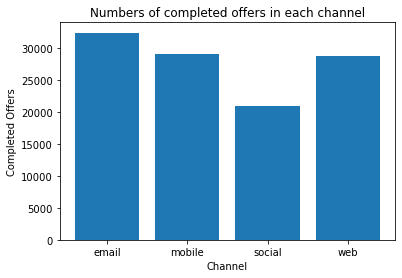

In [28]:
#  Determine the ideal channel that produces the most completed offers.
email_count = df[(df['offer completed'] == 1) & (df['email'] == 1)].shape[0]
mobile_count = df[(df['offer completed'] == 1) & (df['mobile'] == 1)].shape[0]
social_count = df[(df['offer completed'] == 1) & (df['social'] == 1)].shape[0]
web_count = df[(df['offer completed'] == 1) & (df['web'] == 1)].shape[0]
labels = ['email', 'mobile', 'social', 'web']
plt.bar([1,2,3,4], [email_count,mobile_count,social_count,web_count], tick_label = labels)
plt.title('Numbers of completed offers in each channel')
plt.xlabel('Channel')
plt.ylabel('Completed Offers');

<AxesSubplot:title={'center':'Offer type overview'}, ylabel='offer_type'>

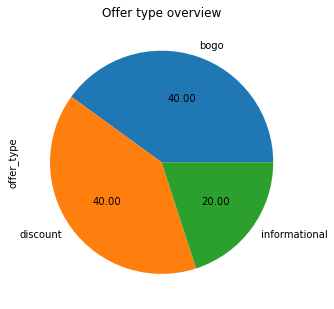

In [29]:
# Taking an overview of offer type using pie chart
portfolio.offer_type.value_counts().plot(kind='pie', figsize=(5,10), autopct="%0.2f", title="Offer type overview")

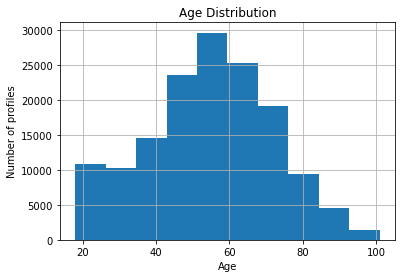

In [30]:
# Take an overview custmers age using par chart.
df['age'].hist();
plt.xlabel('Age')
plt.ylabel('Number of profiles')
plt.title('Age Distribution');

<AxesSubplot:title={'center':'Gender overview'}, ylabel='gender'>

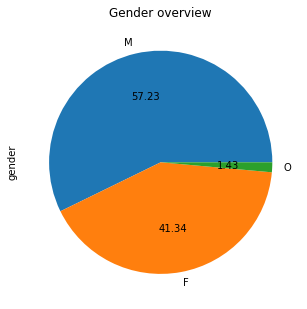

In [31]:
# Take an overview custmers gender using pie chart.
profile.gender.value_counts().plot(kind='pie', figsize=(5,10), autopct="%0.2f", title="Gender overview")

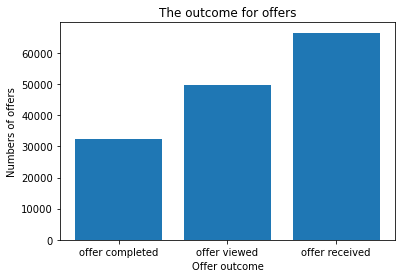

In [32]:
#  Determine the numbers of offers that 'received', 'received and viewd' and 'received and viewd and complated'.
completed_count = (df['offer completed'] == 1).sum()
viewed_count = (df['offer viewed'] == 1).sum()
received_count = (df['offer received'] == 1).sum()
labels = ['offer completed', 'offer viewed', 'offer received']
plt.bar([1,2,3], [completed_count, viewed_count, received_count], tick_label = labels)
plt.title('The outcome for offers')
plt.xlabel('Offer outcome')
plt.ylabel('Numbers of offers');

<a id='M'></a>
# Modeling
Building three machine learning models to predict which offer will be completed.

In [34]:
# Changeing the non number column to numbers
df['gender'] = df['gender'].map({'M': 1, 'F': 2, 'O': 3})
df['offer_type'] = df['offer_type'].map({'bogo': 1, 'discount': 2, 'informational': 3})
df.fillna(0, inplace=True)

In [35]:
# Define the variable and the class attribute
X = df.drop(['reward_x','offer completed','offer viewed', 'offer received', 'became_member_on', 'reward_y', 'offer_id', 'customer_id'], axis = 1)
y = df['offer completed']

In [36]:
# Split the dataset into 70% Training and 30% Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

<a id='M1'></a>
## Build Decision Tree Classifier

In [37]:
# Using simple Decision Tree classifier
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)
perc=dt_clf.score(X_test, y_test)

print("{:.2%}".format(perc))

80.38%


<a id='M2'></a>
## Build Random Forest Classifier

In [38]:
# Using random forest classifier
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
perc= rf_clf.score(X_test, y_test)

print("{:.2%}".format(perc))

75.75%


<a id='M3'></a>
## Build Gradient Boosting Classifier

In [39]:
# Using gradient boosting classifier
gb_clf = ensemble.GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
perc=gb_clf.score(X_test, y_test)

print("{:.2%}".format(perc))

83.14%


<a id='C'></a>
# Conclusion
During this project, I learned a lot of things that helped me improve myself, and I was able to find information and knowledge from the data.

<a id='C2'></a>
## Findings
- Social media does not provide us with a high-completed offer, we must string it out.
- We have a higher number of customers between the ages of 50 and 60.
- The number of male customers is higher than the number of female customers.
- Less than half of the offers received are complete.


<a id='C3'></a>
## Challenges & Obstacles
- Due to my lack of experience with Python and Pandas, I had some difficulties to complete this project.
- Cleaning the value column was difficult it took longer than it should have.